# Titanic Dataset Explaratory Data Analysis (EDA)

---

## 1- Dataset Importing and Overview 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 
sns.set_theme(style="whitegrid")
%matplotlib inline

#### Loading Dataset, And Dataset Overview (Shape - Info - Descriptive Stats)

In [2]:
# Loading Dataset
df = pd.read_csv('titanic.csv', index_col='PassengerId')

# Display the first 10 rows
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
df.shape 

(891, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

## 2- Changing Data Types & Optimizing Memory 
## (It's Not Nessecary Here Since Titanic Dataset Is A Small Dataset, But It's A Good Habit) 

#### First We Check Memory Usage Before Optimizing 

In [6]:
mem_before = df.memory_usage(deep=True).sum() /1024**2
mem_before

np.float64(0.2787895202636719)

#### This Loop Changes Datatype Of A Column From Object To Category If The Unique Values Are Few Compared To Total Rows, To Save Memory

In [7]:
for col in df.select_dtypes(include = ['object']).columns:
    if df[col].nunique() / len(df[col]) < 0.5:
        df[col] = df[col].astype('category')

#### This Loop Downcasts Numeric Columns To The Smallest Numeric Data Type That Can Holds The Data, To Save More Memory

In [8]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    if pd.api.types.is_integer_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], downcast='integer')
    else:
        df[col] = pd.to_numeric(df[col], downcast='float')

In [9]:
mem_after = df.memory_usage(deep=True).sum() / 1024**2
mem_after

np.float64(0.14408588409423828)

---

## 3- Dataset Missing Values & Outliers
### Goals: 
* ### Identifying missing values.
* ### Visualizing missing values & Outliers.
* ### Checking if missingness is related to specific features.
* ### Proposing imputation strategies.

#### Missing Values Counts Per Column 

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Missing Values Counts and Percent

In [11]:
missing_table = df.isnull().sum().to_frame(name='Missing_Count')
missing_table['Missing_Percent'] = (missing_table['Missing_Count']/len(df)) *100
missing_table

,Missing_Count,Missing_Percent
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377


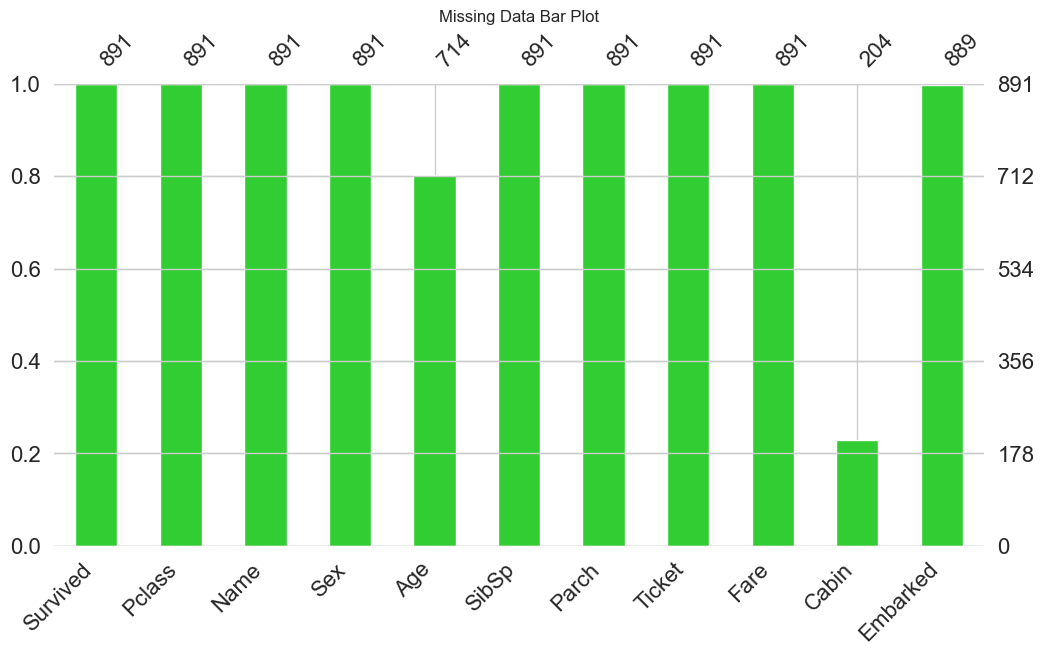

In [12]:
msno.bar(df, figsize=(12,6), color='limegreen')
plt.title('Missing Data Bar Plot')
plt.show()

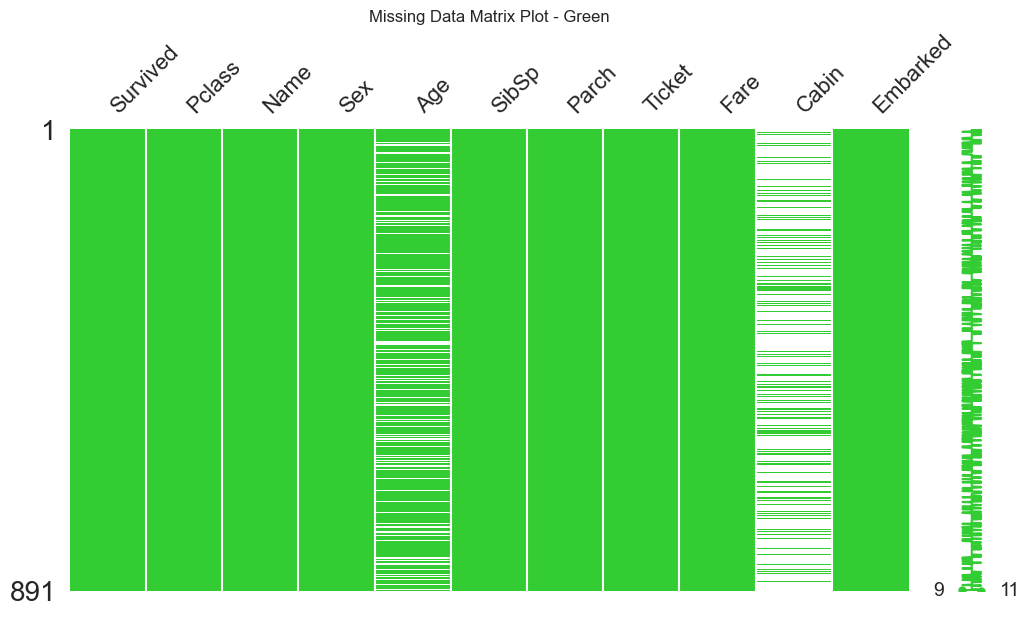

In [13]:
msno.matrix(df, figsize=(12,6), color=(0.2, 0.8, 0.2)) 
plt.title('Missing Data Matrix Plot - Green')
plt.show()

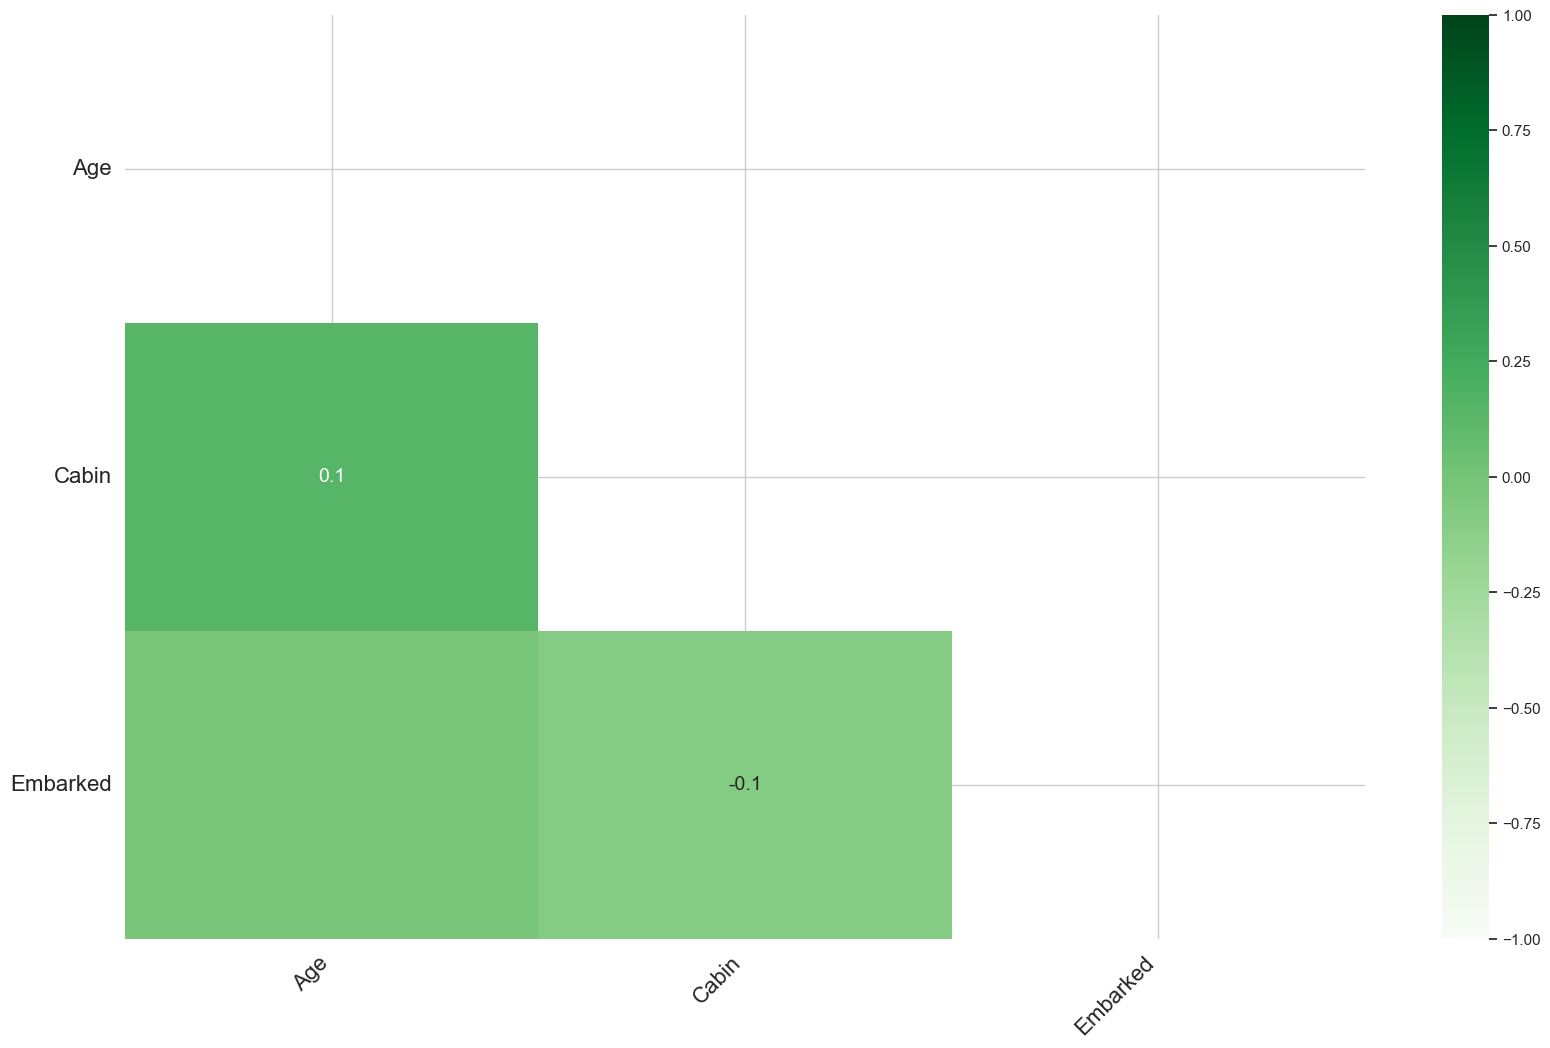

In [14]:
msno.heatmap(df, cmap='Greens') 
plt.show()

In [15]:
df.duplicated().sum()

np.int64(0)

#### Handling Missing Values

In [16]:
# Impute Embarked with Mode 
df.fillna({'Embarked' : df['Embarked'].mode()[0]}, inplace = True)

In [17]:
# Impute Age using mean based on Sex and Pclass 
df['Age'] = df.groupby(['Sex', 'Pclass'],observed = True)['Age'].transform(lambda x : x.fillna(x.mean()))

In [18]:
 # Drop Cabin Column due to high missing values percentage 
df.drop('Cabin', axis= 1, inplace =True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.250000,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.283302,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.925000,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.099998,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.050000,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.000000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.000000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.450001,S


#### Handling Dublicates

In [19]:
# We will check if there are any duplicates
df.duplicated().sum()

np.int64(0)

In [20]:
# There are no duplicates but if duplicates exist we will do this
df.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.250000,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.283302,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.925000,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.099998,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.050000,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.000000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.000000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.450001,S


#### Outliers in Fare

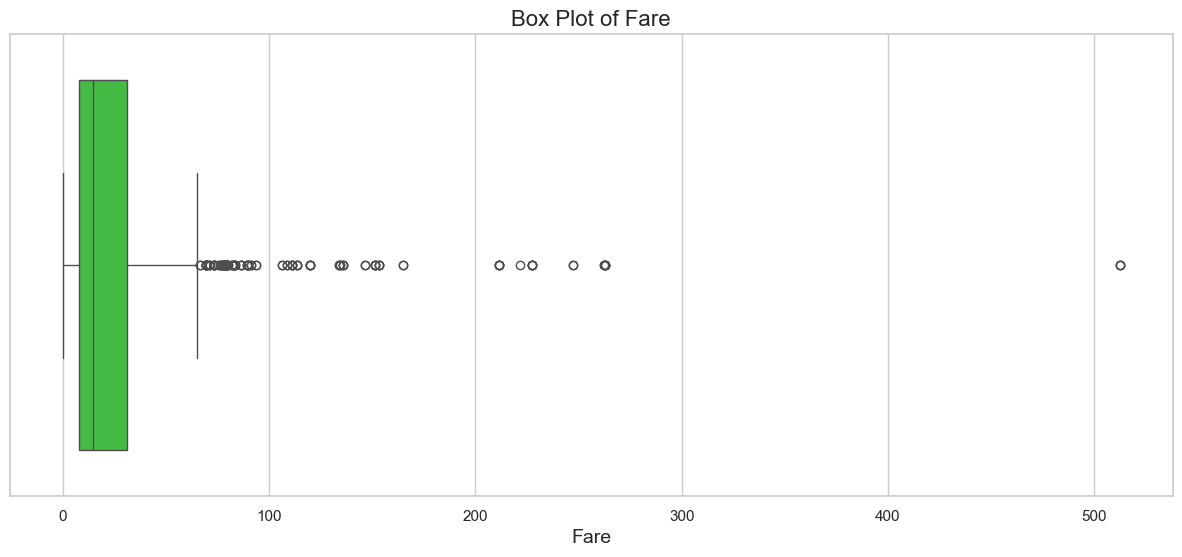

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Fare', color='limegreen', data=df)
plt.title('Box Plot of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.show();

#### Handling Outliers Using IQR And Capping

In [22]:
# Calculate Q1 and Q3 Of The Fare Column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Bounds
lower_bound = Q1 - 1.5 * IQR #left whisker
upper_bound = Q3 + 1.5 * IQR #right whisker

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df['Fare'][(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"Number of outliers in Fare: {outliers.shape[0]}")

Lower Bound: -26.723999619483948
Upper Bound: 65.63439977169037
Number of outliers in Fare: 116


In [23]:
# Cap Fare at upper bound
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])
df['Fare'] = np.where(df['Fare'] < lower_bound, lower_bound, df['Fare'])

#### Now We Check The Box Plot Again To See If There Are Any Outliers 

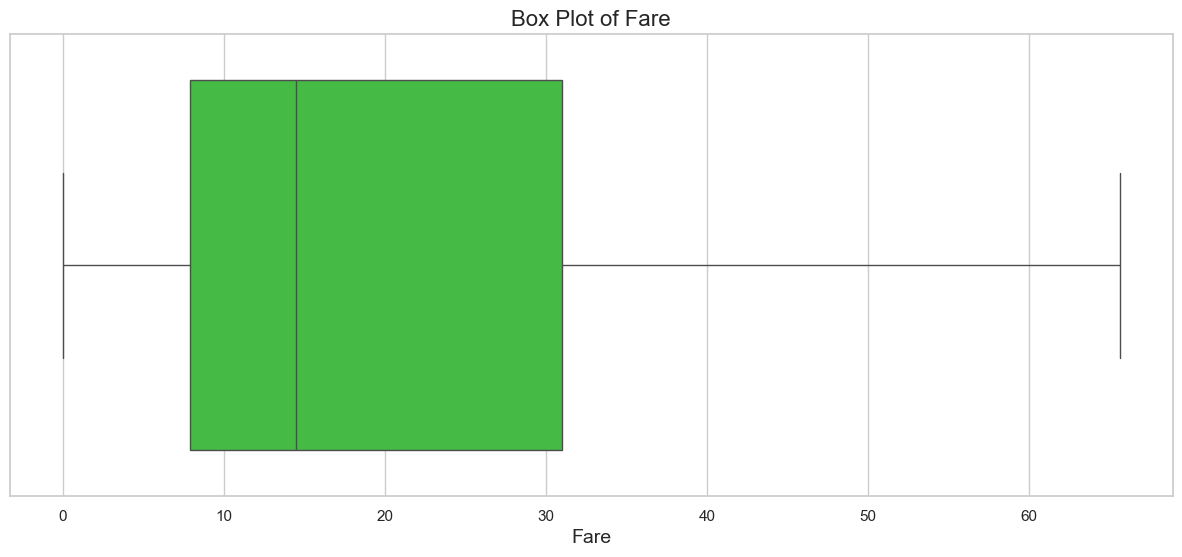

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Fare', color='limegreen', data=df)
plt.title('Box Plot of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.show();

#### Correlation Map 

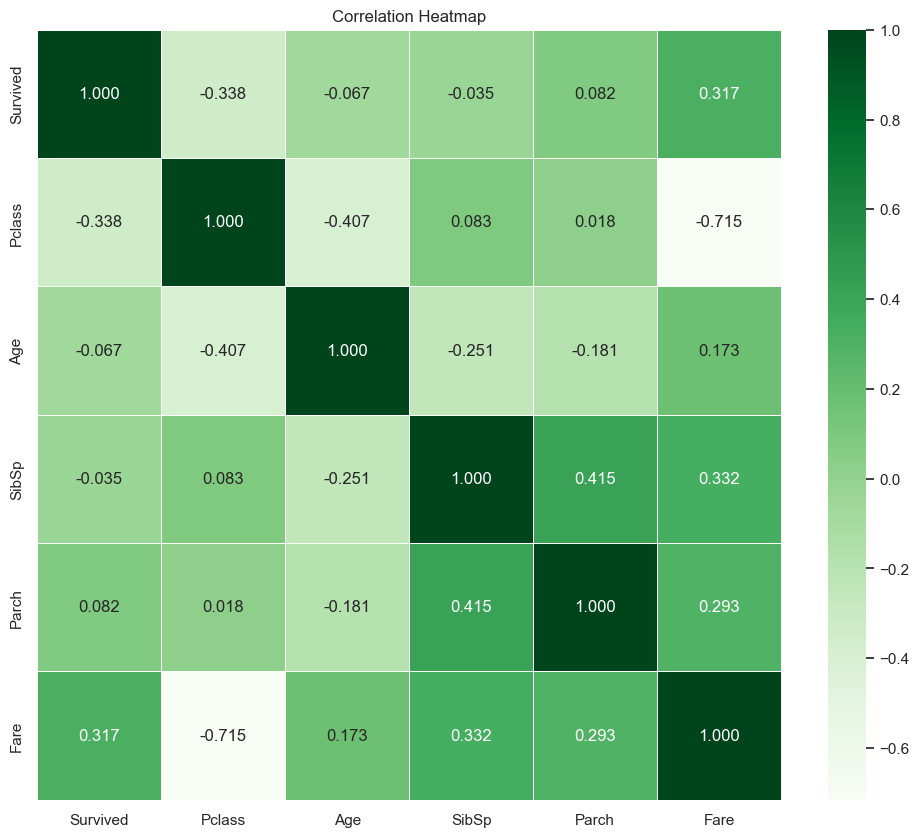

In [25]:
plt.figure(figsize=(12,10))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".3f", cmap='Greens', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

---

## 4- Feature Engineering 
* ### Creating New Columns
* ### Dropping Useless Columns If Exist
* ### Encoding Sex & Embarked Columns

#### Creating Family Size Column

In [26]:
df['Family Size'] = df['SibSp'] + df['Parch'] + 1  
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.250000,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,65.634400,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.925000,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.099998,S,2
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.050000,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.000000,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.000000,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.450001,S,4


#### Creating Is Alone Column

In [27]:
df['Is Alone'] = np.where(df['Family Size'] > 1 , 0,1)

In [28]:
df['Is Alone']

PassengerId
1      0
2      0
3      1
4      0
5      1
      ..
887    1
888    1
889    0
890    1
891    1
Name: Is Alone, Length: 891, dtype: int64

#### Creating Age Group Column

In [29]:
age_bins = [0, 12, 18, 35, 50, 100]
age_labels = ['Kids', 'Teenagers', 'Young Adult', 'Middle Age', 'Elders']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

#### Dropping Name Column

In [30]:
df.drop('Name', axis= 1, inplace=True)

#### Dropping Ticket Column

In [31]:
df.drop('Ticket', axis =1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Is Alone,Age Group
PassengerId,,,,,,,,,,,
1,0,3,male,22.00,1,0,7.250000,S,2,0,Young Adult
2,1,1,female,38.00,1,0,65.634400,C,2,0,Middle Age
3,1,3,female,26.00,0,0,7.925000,S,1,1,Young Adult
4,1,1,female,35.00,1,0,53.099998,S,2,0,Middle Age
5,0,3,male,35.00,0,0,8.050000,S,1,1,Middle Age
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.00,0,0,13.000000,S,1,1,Young Adult
888,1,1,female,19.00,0,0,30.000000,S,1,1,Young Adult
889,0,3,female,21.75,1,2,23.450001,S,4,0,Young Adult


#### Normalizing Fare Column, To Reduce Skewness, Improve Model Stability, And Prevent Bias Toward Large-Valued Features.

In [32]:
df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())
df['Fare']

PassengerId
1      0.110460
2      1.000000
3      0.120745
4      0.809027
5      0.122649
         ...   
887    0.198067
888    0.457077
889    0.357282
890    0.457077
891    0.118078
Name: Fare, Length: 891, dtype: float64

#### Encodig Categorical Columns 

In [33]:
categorical_columns = ['Sex', 'Embarked']
df[categorical_columns] = df[categorical_columns].astype('category')

# One-Hot Encoding 
df = pd.get_dummies(df, columns= categorical_columns, drop_first= True, dtype= int)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,Is Alone,Age Group,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,0.110460,2,0,Young Adult,1,0,1
2,1,1,38.0,1,0,1.000000,2,0,Middle Age,0,0,0
3,1,3,26.0,0,0,0.120745,1,1,Young Adult,0,0,1
4,1,1,35.0,1,0,0.809027,2,0,Middle Age,0,0,1
5,0,3,35.0,0,0,0.122649,1,1,Middle Age,1,0,1


---

### Data Visualization

#### To Understand Data Better (Data Distributions - Relationships Between Columns)

* #### Survival Count By Sex

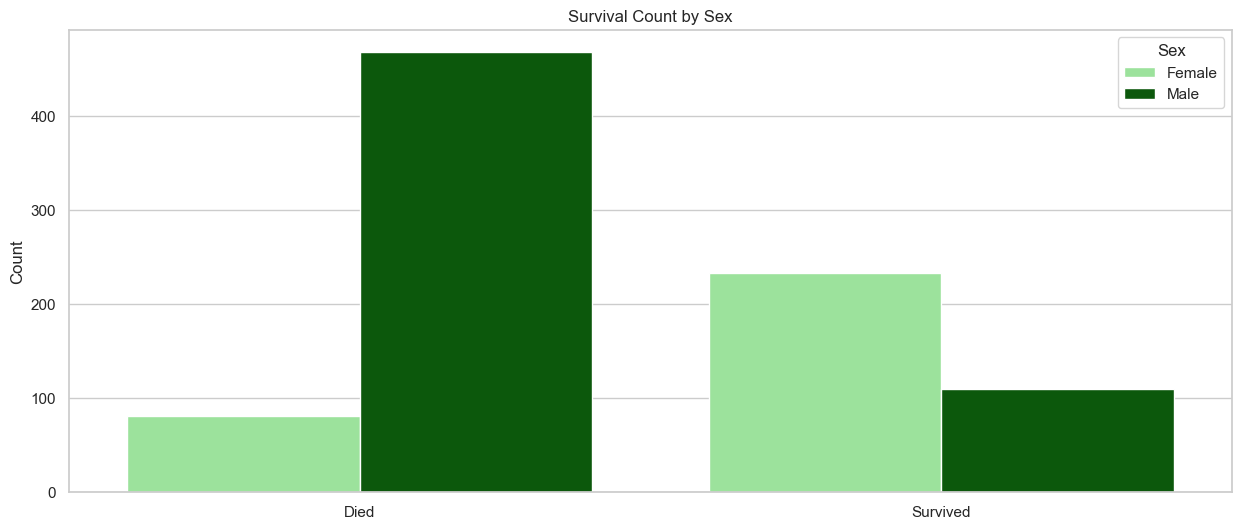

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x='Survived', hue='Sex_male', data=df, palette=['lightgreen', 'darkgreen'])
plt.title('Survival Count by Sex')
plt.ylabel('Count')
plt.xlabel('')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

* #### Age Distribution 

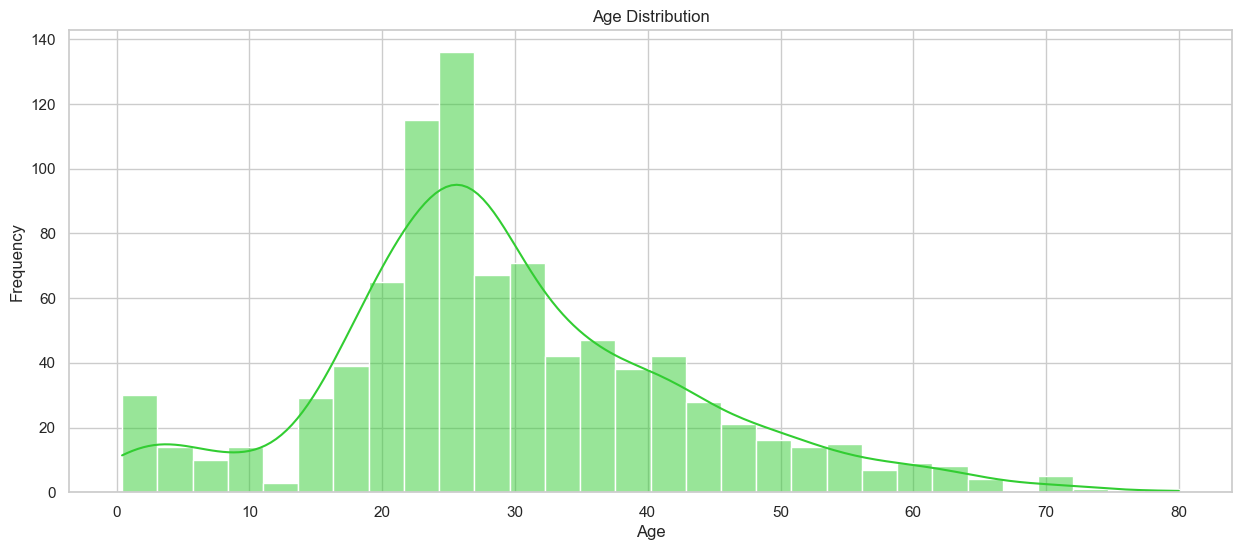

In [36]:
plt.figure(figsize=(15,6))
sns.histplot(df['Age'], bins=30, kde=True, color='limegreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* #### Fare Distribution

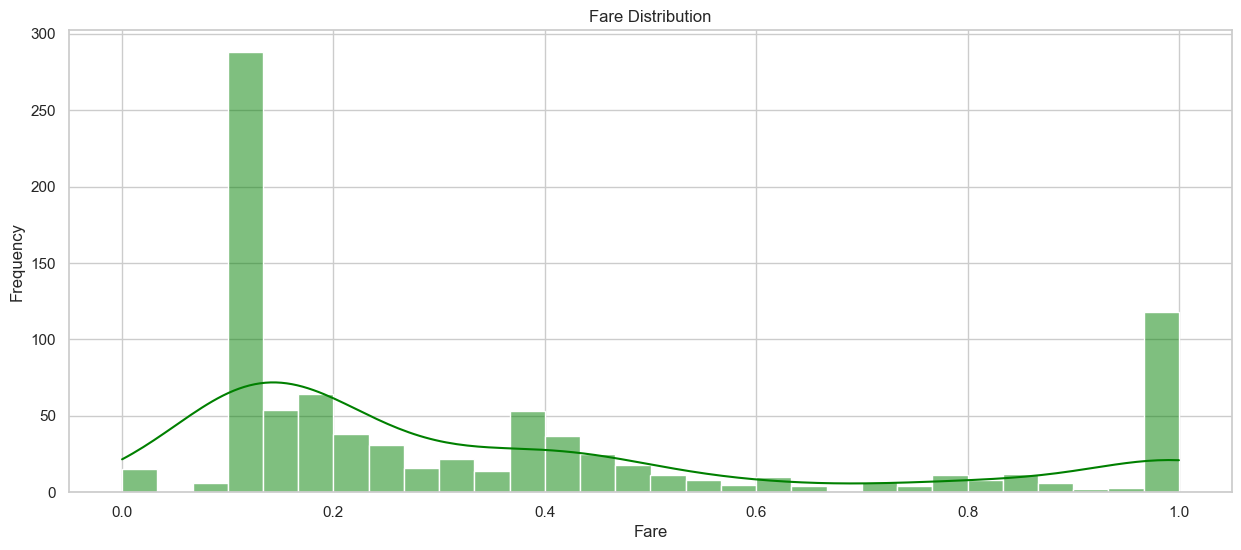

In [37]:
plt.figure(figsize=(15,6))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

* #### Family Size Distribution

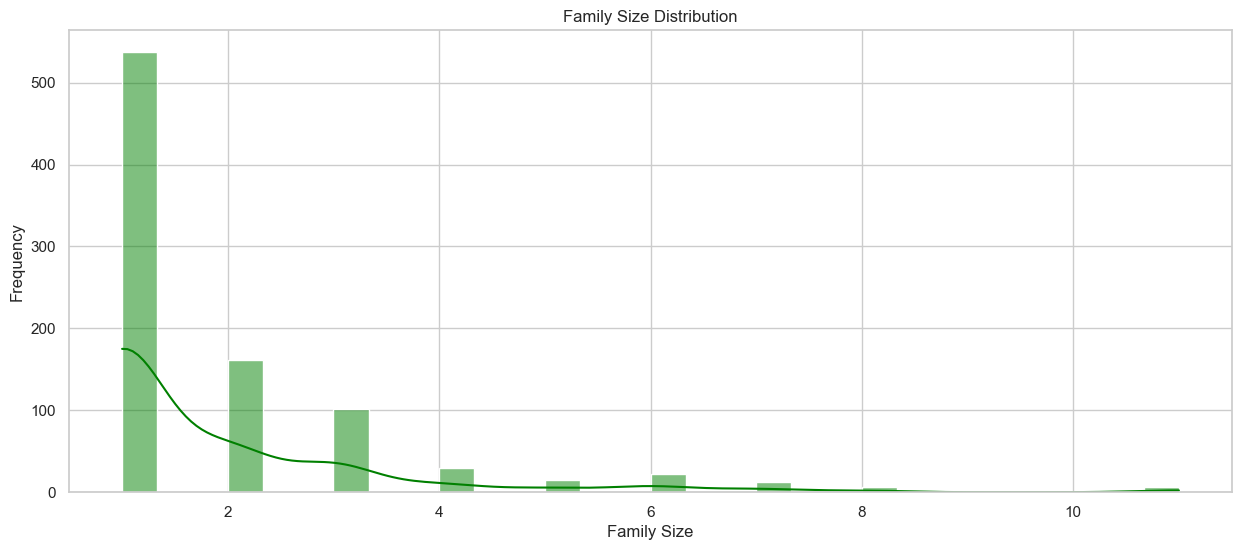

In [38]:
plt.figure(figsize=(15,6))
sns.histplot(df['Family Size'], bins=30, kde=True, color='green')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

* #### Count Of Survivors By Age Group

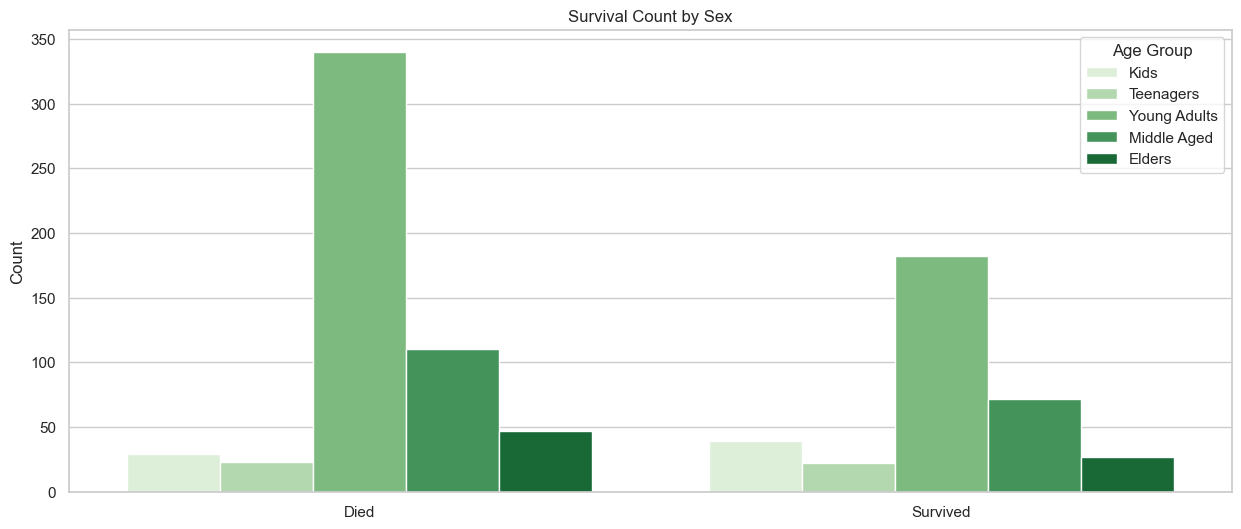

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(x='Survived', hue='Age Group', data=df, palette='Greens')
plt.title('Survival Count by Sex')
plt.ylabel('Count')
plt.xlabel('')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.legend(title='Age Group', labels=['Kids', 'Teenagers','Young Adults','Middle Aged','Elders'])
plt.show()

---

## Insights

- ### Younger Passengers Tended To Have Higher Survival Rates, Especially Those In The Middle-Age Group
- ### Female Passengers Tended To Have Higher Survival Rates.
- ### Most Passengers Were In The Middle-Age Group
- ### There Were More Female Passengers Than Male Passengers